In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pd.options.display.max_columns = 50

In [4]:
df = pd.read_csv('Data/UC_gen_2020.gz',
                     usecols=['birth_age_adj',
                              'birth_year'])
df.rename(columns={'birth_age_adj':'age'}, inplace=True)
df['age'] = df['age'].astype(int)
df.head()

,age,birth_year
0,65,1955
1,57,1963
2,47,1973
3,72,1948
4,53,1967


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168070 entries, 0 to 168069
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   age         168070 non-null  int64
 1   birth_year  168070 non-null  int64
dtypes: int64(2)
memory usage: 2.6 MB


In [6]:
def check_unique(col, df, dropna=False):

    unique_vals = pd.DataFrame()
    unique_vals['count'] = pd.Series(df[col].value_counts(dropna=dropna))
    unique_vals['%'] = pd.Series(round(df[col].value_counts(normalize=True, dropna=dropna)*100, 2))
    
    return unique_vals

In [7]:
def plot_hist(variable, data, rotation=0, ha='center', figsize=(10,7)):
    
    plt.figure(figsize=figsize)
    ax = sns.histplot(x=data[variable],
                       palette='nipy_spectral')
    
    if variable == 'age':
        xtick_lab = [0,20,40,60,80,100]
    if variable == 'birth_year':
        xtick_lab = [1900,1920,1940,1960,1980,2000]
    ax.set_xticklabels(xtick_lab,
                           fontsize=12, weight='bold')
    ax.set_title(f'{variable.title()} Distribution', 
                 fontsize=16,
                 weight='bold')
    ax.set_xlabel(f'{variable.title()}',
                  fontsize=14,
                  weight='bold')
    ax.set_ylabel('Count', fontsize=14, weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    return ax

In [8]:
def plot_count(variable, data, rotation=0, ha='center', figsize=(8,6)):
    
    if variable == 'generation':
        order = ['GenZ', 'Millennial', 'GenX', 'Boomer', 'Greatest-Silent']
    else:
        order = ['Teens', "20's", "30's", "40's", "50's", "60's", "70's", "80's", "90's", "100's"]
    
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=data[variable],
                       order=order,
                       palette='nipy_spectral')
    
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=rotation,
                       horizontalalignment=ha,
                       fontsize=12, weight='bold')
    ax.set_title(f'{variable.title()} Counts', 
                 fontsize=16,
                 weight='bold')
    ax.set_xlabel(f'{variable.title()}',
                  fontsize=14,
                  weight='bold')
    ax.set_ylabel('Count', fontsize=14, weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    return ax

In [9]:
def plot_hist_highlight(variable, data, low, high, rotation=0, ha='center', figsize=(10,7)):
    
    plt.figure(figsize=figsize)
    ax = sns.histplot(x=data[variable], kde=True,
                       palette='nipy_spectral')
    
    if variable == 'age':
        xtick_lab = [0,20,40,60,80,100]
    if variable == 'birth_year':
        xtick_lab = [1900,1920,1940,1960,1980,2000]
    ax.set_xticklabels(xtick_lab,
                       fontsize=12, weight='bold')

    kde_x, kde_y = ax.lines[0].get_data()
    print(ax.lines)
    
    #plotting the two lines
    p1 = plt.axvline(x=low, color='black', ls='--', lw=4)
    p2 = plt.axvline(x=high, color='black', ls='--', lw=4)


    ax.fill_between(kde_x, kde_y, where=(kde_x<low) | (kde_x>high) , 
                interpolate=True, color=['red', 'yellow'])
    
    ax.set_title(f'{variable.title()} Distribution', 
                 fontsize=16,
                 weight='bold')
    ax.set_xlabel(f'{variable.title()}',
                  fontsize=14,
                  weight='bold')
    ax.set_ylabel('Count', fontsize=14, weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    return ax

/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


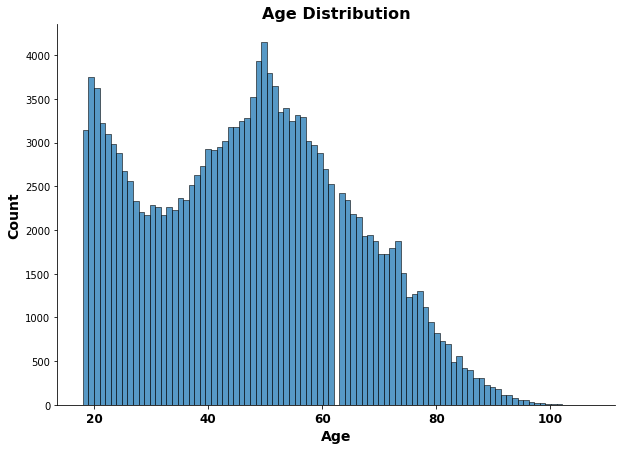

In [10]:
plot_hist('age', df);
# plt.savefig('Figures/blog_bin_num_features/age_distr', bbox_inches = "tight");

In [11]:
df['first_pres_elec'] = np.where(df['age']<22, 1, 0)
check_unique('first_pres_elec', df)

,count,%
0,154322,91.82
1,13748,8.18


In [12]:
df['senior'] = np.where(df['age']>=65, 1, 0)
check_unique('senior', df)

,count,%
0,137614,81.88
1,30456,18.12


/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


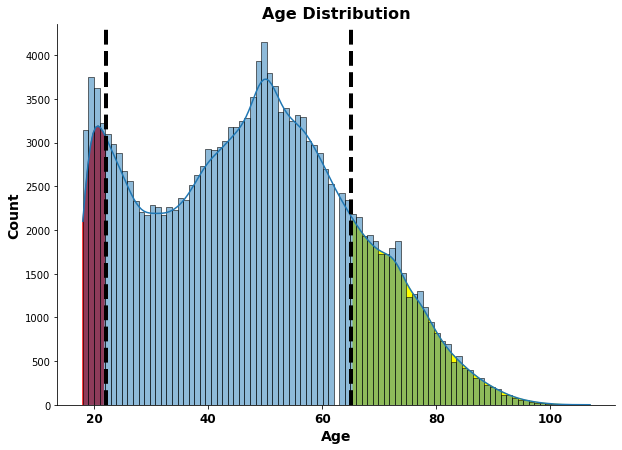

In [13]:
plot_hist_highlight('age', df, 22, 65)
plt.savefig('Figures/blog_bin_num_features/age_thresh', bbox_inches = "tight");

/Users/maxsteele/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


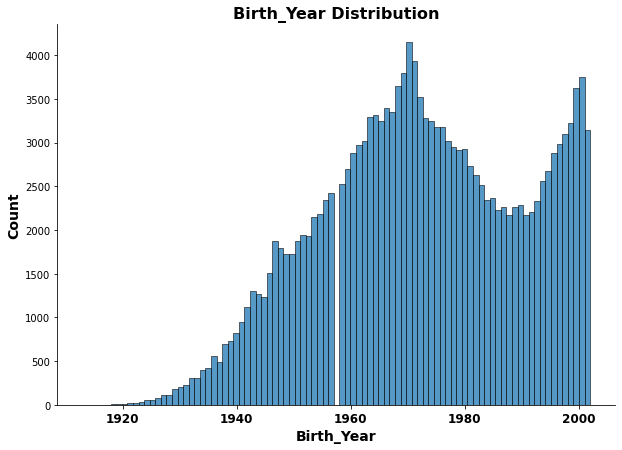

In [14]:
plot_hist('birth_year', df);

In [16]:
## Define function for grouping into generation categories by birth year
def get_gen_grp(birth_year):
    
    if birth_year < 1946:
        return 'Greatest-Silent'
    
    elif (birth_year > 1945) & (birth_year < 1965):
        return 'Boomer'
    
    elif (birth_year > 1964) & (birth_year < 1981):
        return 'GenX'
    
    elif (birth_year > 1980) & (birth_year < 1997):
        return 'Millennial'
    
    elif birth_year > 1996:
        return 'GenZ'
    
    else:
        return 'Missing'

In [17]:
## Create a new column grouping birth_year into generations
df['generation'] = df['birth_year'].apply(get_gen_grp)

## Check distribution
check_unique('generation', df)

,count,%
GenX,53717,31.96
Boomer,44171,26.28
Millennial,38600,22.97
GenZ,19834,11.80
Greatest-Silent,11748,6.99


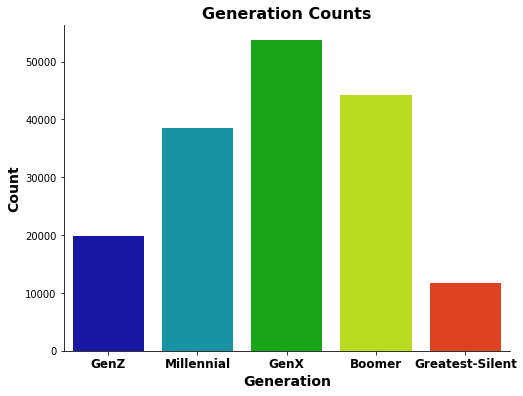

In [18]:
plot_count('generation', df)
plt.savefig('Figures/blog_bin_num_features/gen_grps', bbox_inches = "tight");

In [20]:
## Bin registered voters into generation groups using pd.cut
# Define group labels
cut_labels = ['Greatest-Silent', 'Boomer', 'GenX', 'Millennial', 'GenZ']

# Define bin edges
cut_bins = [0, 1945, 1964, 1980, 1996, 2100]

# Create a new column grouping birth_year into generations
df['cut_generation'] = pd.cut(df['birth_year'], bins=cut_bins, labels=cut_labels)

## Check distribution
check_unique('cut_generation', df)

,count,%
GenX,53717,31.96
Boomer,44171,26.28
Millennial,38600,22.97
GenZ,19834,11.80
Greatest-Silent,11748,6.99


In [21]:
## Bin registered voters into generation groups using pd.cut
# Define bin edges
cut_bins = [10, 20, 30, 40, 50 ,60 ,70, 80, 90, 100, 110]

# Create a new column grouping birth_year into generations
df['cut_age'] = pd.cut(df['age'], bins=cut_bins)

## Check distribution
check_unique('cut_age', df)

,count,%
"(40, 50]",33349,19.84
"(50, 60]",32924,19.59
"(20, 30]",26411,15.71
"(30, 40]",24427,14.53
"(60, 70]",21781,12.96
"(70, 80]",13614,8.10
"(10, 20]",10520,6.26
"(80, 90]",4349,2.59
"(90, 100]",681,0.41
"(100, 110]",14,0.01


In [22]:
np.arange(10, 111, 10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])

In [23]:
## Bin registered voters into generation groups using pd.cut
# Define group labels
cut_labels = ['Teens', "20's", "30's", "40's", "50's", "60's", "70's", "80's", "90's", "100's"]

# Define bin edges
cut_bins = np.arange(10, 111, 10)

# Create a new column grouping birth_year into generations
df['cut_age'] = pd.cut(df['age'], bins=cut_bins, labels=cut_labels)

## Check distribution
check_unique('cut_age', df)

,count,%
40's,33349,19.84
50's,32924,19.59
20's,26411,15.71
30's,24427,14.53
60's,21781,12.96
70's,13614,8.10
Teens,10520,6.26
80's,4349,2.59
90's,681,0.41
100's,14,0.01


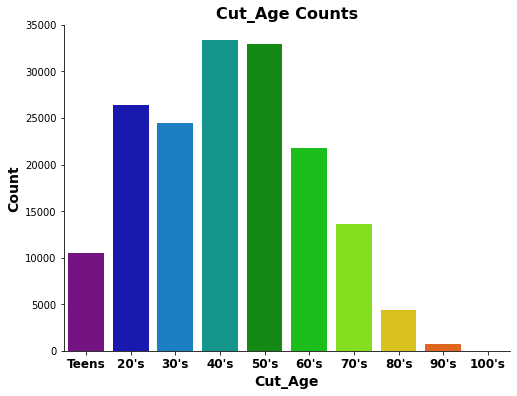

In [24]:
plot_count('cut_age', df)
plt.savefig('Figures/blog_bin_num_features/decade_grps', bbox_inches = "tight");